In [161]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import sys

In [162]:
# Importing the csv file in pandas and storing it in a dataframe.

file_one = "SFA Craft Demo and Case Study - Huffman.csv"
SFA_df = pd.read_csv(file_one)
SFA_df = SFA_df.drop('opendate', axis = 1)
SFA_df.head()

,ID,BAD,AreaCode,EAScore,IdentityRank,DeviceBrowserType,IpAddressLocCity,IpAddressLocCountry,IsValid,IsConnected,Personal,Reputation Level,ReceivingMail,Type,Volume Score,Result Number,EmailDays
0,134457,1,973,NaN,425.0,TRIDENT,NaN,UNITED STATES,True,True,True,1,True,L,1,2,95
1,6360592,0,310,930.0,652.0,TRIDENT,AUSTIN,UNITED STATES,True,True,True,1,True,F,1,1,116
2,462987,0,502,704.0,683.0,CHROME,LOUISVILLE,UNITED STATES,True,True,True,1,NaN,M,1,1,116
3,309372,0,518,113.0,477.0,FIREFOX,SCHENECTADY,UNITED STATES,True,True,True,1,NaN,L,1,1,1513
4,397009,1,713,NaN,587.0,FIREFOX,LOS ANGELES,UNITED STATES,True,NaN,True,1,NaN,N,1,1,0


In [163]:
# # Storing the rest of the data as the test set
# df_train = SFA_df.loc[SFA_df.index.isin(df_0_7.index)]
# df_test = SFA_df.loc[~SFA_df.index.isin(df_0_7.index)]
# df_test.head()

In [164]:
# df_train.columns # This will show all the column names
# df_train.head(10) # Show first 10 records of dataframe
# #df_train.describe() #You can look at summary of numerical fields by using describe() function

In [165]:
ID_col = ['ID']
target_col = ["BAD"]
cat_cols = ['DeviceBrowserType','IpAddressLocCity','IpAddressLocCountry','IsValid','IsConnected','Personal','ReceivingMail','Type']
num_cols= list(set(list(SFA_df.columns))-set(cat_cols)-set(ID_col)-set(target_col))
 

In [166]:
# ID_col = ['ID']
# target_col = ["BAD"]
# cat_cols = ['DeviceBrowserType','IpAddressLocCity','IpAddressLocCountry','IsValid','IsConnected','Personal','ReceivingMail','Type']
# num_cols= list(set(list(df_test.columns))-set(cat_cols)-set(ID_col)-set(target_col))

In [167]:
#df_train.isnull().any()

In [168]:
num_cat_cols = num_cols+cat_cols # Combined numerical and Categorical variables

#Create a new variable for each variable having missing value with VariableName_NA 
# and flag missing value with 1 and other with 0

for var in num_cat_cols:
    if SFA_df[var].isnull().any()==True:
        SFA_df[var+'_NA']=SFA_df[var].isnull()*1

In [169]:
SFA_df

,ID,BAD,AreaCode,EAScore,IdentityRank,DeviceBrowserType,IpAddressLocCity,IpAddressLocCountry,IsValid,IsConnected,...,Volume Score,Result Number,EmailDays,EAScore_NA,IdentityRank_NA,DeviceBrowserType_NA,IpAddressLocCity_NA,IpAddressLocCountry_NA,IsConnected_NA,ReceivingMail_NA
0,134457,1,973,NaN,425.0,TRIDENT,NaN,UNITED STATES,True,True,...,1,2,95,1,0,0,1,0,0,0
1,6360592,0,310,930.0,652.0,TRIDENT,AUSTIN,UNITED STATES,True,True,...,1,1,116,0,0,0,0,0,0,0
2,462987,0,502,704.0,683.0,CHROME,LOUISVILLE,UNITED STATES,True,True,...,1,1,116,0,0,0,0,0,0,1
3,309372,0,518,113.0,477.0,FIREFOX,SCHENECTADY,UNITED STATES,True,True,...,1,1,1513,0,0,0,0,0,0,1
4,397009,1,713,NaN,587.0,FIREFOX,LOS ANGELES,UNITED STATES,True,NaN,...,1,1,0,1,0,0,0,0,1,1
5,7725516,1,859,NaN,394.0,CHROME,REYNOLDSBURG,UNITED STATES,True,NaN,...,1,1,104,1,0,0,0,0,1,0
6,9696430,0,419,99.0,348.0,CHROME,NEW YORK,UNITED STATES,True,True,...,1,1,1596,0,0,0,0,0,0,1
7,1558104,1,631,NaN,512.0,FIREFOX,MINNEAPOLIS,UNITED STATES,True,True,...,1,1,0,1,0,0,0,0,0,1
8,6210621,0,970,87.0,517.0,NaN,NaN,NaN,True,True,...,1,1,2531,0,0,1,1,1,0,0
9,3945665,0,319,300.0,526.0,FIREFOX,KALONA,UNITED STATES,True,True,...,2,3,114,0,0,0,0,0,0,0


In [170]:
SFA_df[num_cols] = SFA_df[num_cols].fillna(SFA_df[num_cols].median(),inplace=True)

SFA_df[cat_cols] = SFA_df[cat_cols].fillna(value = -9999)

SFA_df.head()

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,ID,BAD,AreaCode,EAScore,IdentityRank,DeviceBrowserType,IpAddressLocCity,IpAddressLocCountry,IsValid,IsConnected,...,Volume Score,Result Number,EmailDays,EAScore_NA,IdentityRank_NA,DeviceBrowserType_NA,IpAddressLocCity_NA,IpAddressLocCountry_NA,IsConnected_NA,ReceivingMail_NA
0,134457,1,973,495.0,425.0,TRIDENT,-9999,UNITED STATES,True,True,...,1,2,95,1,0,0,1,0,0,0
1,6360592,0,310,930.0,652.0,TRIDENT,AUSTIN,UNITED STATES,True,True,...,1,1,116,0,0,0,0,0,0,0
2,462987,0,502,704.0,683.0,CHROME,LOUISVILLE,UNITED STATES,True,True,...,1,1,116,0,0,0,0,0,0,1
3,309372,0,518,113.0,477.0,FIREFOX,SCHENECTADY,UNITED STATES,True,True,...,1,1,1513,0,0,0,0,0,0,1
4,397009,1,713,495.0,587.0,FIREFOX,LOS ANGELES,UNITED STATES,True,-9999,...,1,1,0,1,0,0,0,0,1,1


In [171]:
#create label encoders for categorical features
for var in cat_cols:
 number = LabelEncoder()
 SFA_df[var] = number.fit_transform(SFA_df[var].astype('str'))

#Target variable is also a categorical so convert it
SFA_df["BAD"] = number.fit_transform(SFA_df["BAD"].astype('str'))
SFA_df.head()

,ID,BAD,AreaCode,EAScore,IdentityRank,DeviceBrowserType,IpAddressLocCity,IpAddressLocCountry,IsValid,IsConnected,...,Volume Score,Result Number,EmailDays,EAScore_NA,IdentityRank_NA,DeviceBrowserType_NA,IpAddressLocCity_NA,IpAddressLocCountry_NA,IsConnected_NA,ReceivingMail_NA
0,134457,1,973,495.0,425.0,13,0,3,1,2,...,1,2,95,1,0,0,1,0,0,0
1,6360592,0,310,930.0,652.0,13,49,3,1,2,...,1,1,116,0,0,0,0,0,0,0
2,462987,0,502,704.0,683.0,1,538,3,1,2,...,1,1,116,0,0,0,0,0,0,1
3,309372,0,518,113.0,477.0,4,832,3,1,2,...,1,1,1513,0,0,0,0,0,0,1
4,397009,1,713,495.0,587.0,4,537,3,1,0,...,1,1,0,1,0,0,0,0,1,1


In [172]:
# Randomly selecting 70% of the data

# # Storing the rest of the data as the test set
# df_train = SFA_df.loc[SFA_df.index.isin(df_0_7.index)]
# df_test = SFA_df.loc[~SFA_df.index.isin(df_0_7.index)]
# df_test.head()

In [173]:
# df_train['is_train'] = np.random.uniform(0, 1, len(df_train)) <= .75
# Train, Validate = df_train[df_train['is_train']==True], df_train[df_train['is_train']==False]

In [174]:
features=list(set(list(SFA_df.columns))-set(ID_col)-set(target_col))

df_0_7 = SFA_df.sample(frac=0.7)

# Storing random 70% of data as the training set

df_train = SFA_df.loc[SFA_df.index.isin(df_0_7.index)]
#df_train.head()

df_train['is_train'] = np.random.uniform(0, 1, len(df_train)) <= .75
Train, Validate = df_train[df_train['is_train']==True], df_train[df_train['is_train']==False]


df_test = SFA_df.loc[~SFA_df.index.isin(df_0_7.index)]
df_test.head()
data_to_match = df_test['BAD'].tolist()
data_to_match

df_train['is_train'] = np.random.uniform(0, 1, len(df_train)) <= .75
#     print(df_train['is_train'])
Train, Validate = df_train[df_train['is_train']==True], df_train[df_train['is_train']==False]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [175]:
x_train = Train[list(features)].values
y_train = Train["BAD"].values
x_validate = Validate[list(features)].values
y_validate = Validate["BAD"].values
x_test=df_test[list(features)].values

In [176]:
random.seed(100) # Read more about it
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [177]:
status = rf.predict_proba(x_validate)
fpr, tpr, _ = roc_curve(y_validate, status[:,1])
roc_auc = auc(fpr, tpr)
#print(roc_auc)

final_status = rf.predict_proba(x_test)
df_test["BAD"]=final_status[:,1]

#df_test.to_csv('output.csv',columns=['ID','BAD'])
for i, frame in df_test['BAD'].iteritems():
    if frame > 0.5:
        df_test.loc[i, 'BAD'] = 1.0
    else:
        df_test.loc[i, 'BAD'] = 0.0
        
        
df_test['BAD'].head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0     1.0
7     1.0
16    0.0
21    0.0
23    0.0
Name: BAD, dtype: float64

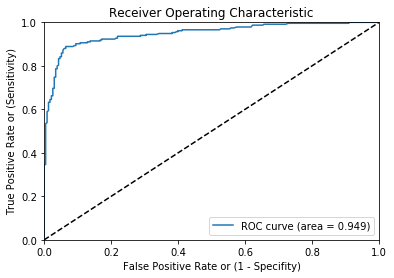

In [178]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [179]:
pred = df_test['BAD'].tolist()

In [180]:
true_positive = 0
true_negetive = 0
false_positive = 0
false_negetive = 0

for i in range(len(pred)):
    if (pred[i] == 1) and (data_to_match[i] == 1):
        true_positive+=1
    elif pred[i] == 0 and data_to_match[i] == 0:
        true_negetive+=1
    elif pred[i] == 1 and data_to_match[i] == 0:
        false_positive+=1
    elif pred[i] == 0 and data_to_match[i] == 1:
        false_negetive+=1
        
        
print("TRUE POSITIVE: ",true_positive)
print("FALSE POSITIVE: ",false_positive)
print("TRUE NEGETIVE: ",true_negetive)
print("FALSE NEGETIVE: ",false_negetive)


TRUE POSITIVE:  337
FALSE POSITIVE:  25
TRUE NEGETIVE:  411
FALSE NEGETIVE:  60


In [187]:
Precision = true_positive/(true_positive+false_positive)
Precision
recall = true_positive/(true_positive+false_negetive)
recall
F_score = (2*Precision*recall)/(Precision+recall)
F_score

0.8880105401844532

In [181]:
result = []
for i in range(len(pred)):
    if pred[i] == data_to_match[i]:
        result.append('True')
    else:
        result.append('False')


In [182]:
c = 0
for i in range(len(result)):
    if result[i] == 'True':
        c+=1
c

748